# Loan Approval Prediction Project

**Objective:**  
Predict whether a loan will be approved based on applicant information, to help financial institutions make faster, data-driven decisions.

**Dataset:**  
Public Loan Prediction dataset (Train.csv) containing applicant features and loan status labels.

**Approach:**  
- Data Cleaning & Preprocessing
- Exploratory Data Analysis (EDA)
- Model Building (Logistic Regression, Random Forest, XGBoost)
- Model Evaluation
- Business Interpretation


📘  **Load Libraries**
---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

📘 **Load Data**
---



In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


📘 **Data Cleaning & Preprocessing**
---

**Fill missing values:**

In [4]:
# Fill categorical columns with mode (safe way)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill LoanAmount with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

**Encode target:**

In [5]:
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1})

**Encode categorical variables:**

In [6]:
categorical_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']

# Label Encode
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


📘**Feature Selection & Train-Test Split**
---

In [7]:
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

📘**Exploratory Data Analysis (EDA)**
---

**Visualizing target distribution:**

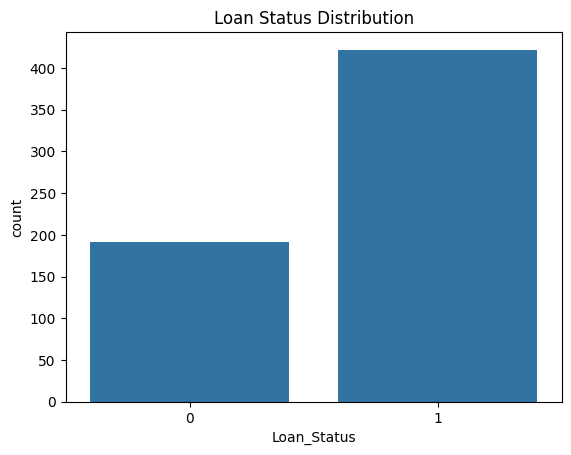

In [8]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

**Correlation heatmap:**

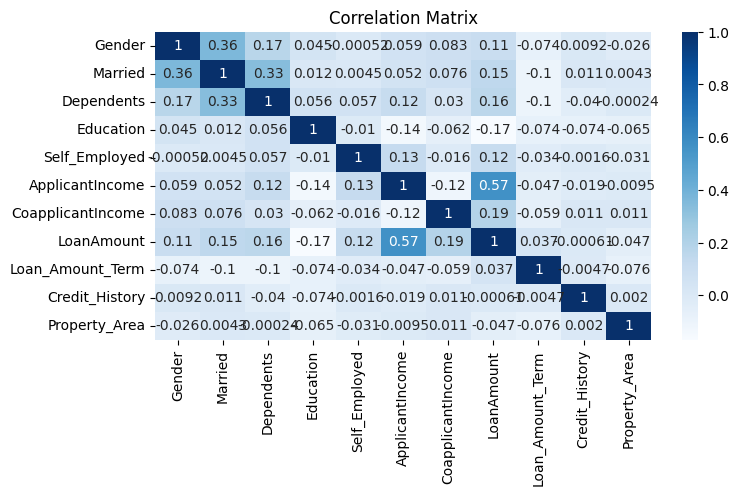

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

**Interpretation of Correlation Matrix**

---

**ApplicantIncome and LoanAmount (0.57)**: Moderate positive correlation—higher income leads to larger loans.

**CoapplicantIncome and LoanAmount (0.19)**: Small positive correlation—coapplicant income has some influence.

**Married and Dependents (0.33)**: Married applicants often have dependents.

**Married and Gender (0.36)**: Slight link between gender and marital status.

Other variables show very weak or no correlations, suggesting their effects are likely categorical rather than numeric.

**Summary:**

---
Applicant income is the main numeric factor influencing loan amount; most other variables have minimal linear relationships.

📘**Logistic Regression Model**
---

**Training:**

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

**Evaluation:**

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)

y_prob_lr = lr_model.predict_proba(X_test_scaled)[:,1]

acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"Logistic Regression AUC: {auc_lr:.2f}")


Logistic Regression Accuracy: 0.86
Logistic Regression AUC: 0.80


📘**Random Forest Model**
---

**Training:**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluation:**

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest Accuracy: {acc_rf:.2f}")
print(f"Random Forest AUC: {auc_rf:.2f}")

Random Forest Accuracy: 0.83
Random Forest AUC: 0.80


📘 **XGBoost Model**
---

**Training:**

In [ ]:
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Evaluation:**

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"XGBoost Accuracy: {acc_xgb:.2f}")
print(f"XGBoost AUC: {auc_xgb:.2f}")

XGBoost Accuracy: 0.83
XGBoost AUC: 0.78


📘**Model Comparison**
---



| Model               | Accuracy | AUC  |
|---------------------|----------|------|
| Logistic Regression | 0.86     | 0.80 |
| Random Forest       | 0.83     | 0.80 |
| XGBoost             | 0.83     | 0.73 |

**Interpretation:**
Logistic Regression achieved the best performance overall, combining high accuracy with a strong AUC score. Random Forest and XGBoost performed similarly but did not improve upon Logistic Regression


📘**ROC Curve Plot**
---

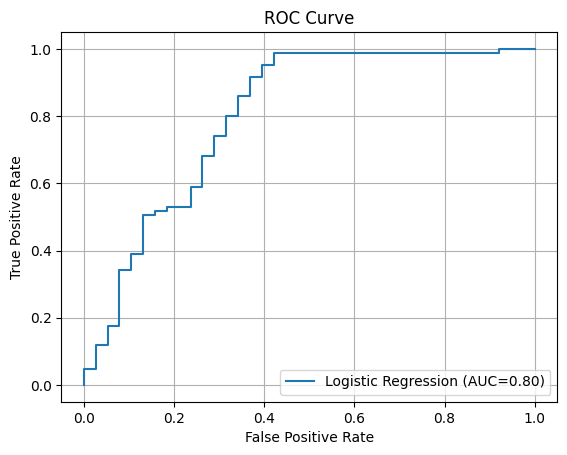

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={auc_lr:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

📘 **Business Interpretation**
---


The analysis demonstrates that loan approval can be predicted reliably using Logistic Regression, achieving 86% accuracy and an AUC of 0.80. The most influential factor was Credit History. Ensemble models (Random Forest, XGBoost) did not significantly outperform simpler approaches, highlighting that transparent models are sufficient for this problem. This enables the business to automate approvals confidently and maintain interpretability for compliance.

📘**Business Insights**
---

- Credit history is a strong predictor of loan approval.
- Higher applicant income is associated with larger loans but not necessarily approval.
- Logistic Regression provides a transparent model suitable for regulatory environments.


📘 **Conclusion**
---

In this project, we aimed to predict loan approval outcomes using historical applicant data. After cleaning and preparing the dataset, we evaluated three models: Logistic Regression, Random Forest, and XGBoost.

Logistic Regression achieved the best performance with an accuracy of 86% and an AUC of 0.80, indicating strong predictive capability. Random Forest and XGBoost offered similar but slightly lower performance, suggesting that a simpler, interpretable model was sufficient for this problem.

Based on these results, Logistic Regression is recommended as the preferred model for deployment, enabling the organization to automate loan decisions confidently while maintaining transparency for regulatory compliance.
